## В этом ноутбуке мы познакомимся с модулем pandas

Pandas — это библиотека Python, предоставляющая широкие возможности для анализа данных. Данные, с которыми работают датасаентисты, часто хранятся в форме табличек — например, в форматах .csv, .tsv или .xlsx. С помощью библиотеки Pandas такие табличные данные очень удобно загружать, обрабатывать и анализировать с помощью SQL-подобных запросов.

In [44]:
import pandas as pd #Подключаем библиотеку pandas

___
Основной элемент pandas - DataFrame. По сути это таблица, в которой есть строки и столбцы.


In [45]:
#Создадим DataFrame из словаря:
data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

data

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [46]:
#Создадим DataFrame из списка списков:
data = pd.DataFrame([[1, 4, 7], [2, 5, 8], [3, 6, 9]])

#Переименуем столбцы:
data.columns = ['A', 'B', 'C']

data

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


Индексация и извлечение данных

``df['название_столбца']`` — извлечение столбца по названию.

``df.iloc[номер_строки]`` — извлечение строки по числовому индексу.

In [47]:
#При обращении к столбцу DataFrame возвращает объект Series:
data['A']

0    1
1    2
2    3
Name: A, dtype: int64

In [48]:
#При обращении к строке DataFrame также возвращается Series:
data.loc[0]

A    1
B    4
C    7
Name: 0, dtype: int64

In [49]:
#Можем обращаться к элементам DataFrame по индексу:
data.loc[0, 'A']

np.int64(1)

In [50]:
#Можеи изменить значение элемента DataFrame:
print(data)

data.loc[0, 'A'] = 100

print(data)

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
     A  B  C
0  100  4  7
1    2  5  8
2    3  6  9


In [51]:
#Иногда бывает полезно применить функцию к каждому элементу DataFrame:
data = data.apply(lambda x: x * 2)

data

,A,B,C
0,200,8,14
1,4,10,16
2,6,12,18


In [52]:
#Или к конкретному столбцу:
data['A'] = data['A'].apply(lambda x: x * 2)

data

,A,B,C
0,400,8,14
1,8,10,16
2,12,12,18


In [53]:
#Обращайте внимание что операции осуществляются не inplace, если хотите изменить DataFrame, то нужно присвоить результат обратно:
#(inplace означает, что изменения будут внесены в исходный объект, а не возвращен новый)
print(data)

data.apply(lambda x: x // 2)

print(data)

data = data.apply(lambda x: x // 2)

print(data)

     A   B   C
0  400   8  14
1    8  10  16
2   12  12  18
     A   B   C
0  400   8  14
1    8  10  16
2   12  12  18
     A  B  C
0  200  4  7
1    4  5  8
2    6  6  9


In [54]:
#Можно выбирать строки по условию:
data[data['A'] > 10]

,A,B,C
0,200,4,7


In [55]:
#Или комбинировать условия:
data[(data['A'] % 2 == 0) & (data['B'] % 2 == 1)]

,A,B,C
1,4,5,8


In [56]:
#Можем выводить статистику по DataFrame:
print(data.mean(), data.median(), sep='\n________________\n')

A    70.0
B     5.0
C     8.0
dtype: float64
________________
A    6.0
B    5.0
C    8.0
dtype: float64


___
### Основные функции pandas

При работе с большими датасетами часто применяются следующие функции:

``read_csv("путь до файла")`` — загружает данные из таблицы формата csv (текст с разделителями)

Просмотр данных

``df.head()`` — выводит первые несколько строк данных.

``df.tail()`` — выводит последние несколько строк данных.

``df.shape`` — размеры таблицы (количество строк и столбцов).

``df.info()`` — характеристики данных

Основные статистические характеристики

``df.describe()`` — выводит основные статистические характеристики данных.

In [57]:
data = pd.read_csv('Titanic-Dataset.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Датасет выше - данные пассажиров Титаника.

`PassangerId` - уникальный id

`Survived` - выжил/погиб

`Pclass` - билет какого класса был у пассажира

`Name` - полное имя

`Sex` - пол

`Age` - возраст

`SibSp` - количество братьев/сестер на борту

`Parch` - количество детей/родителей на борту

`Ticket` - номер билета

`Fare` - плата за проезд

`Cabin` - номер каюты

`Embarked` - кодовое обозначение места где пассажир сел на борт

In [58]:
data.shape

(891, 12)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
#include='all' позволяет вывести описательные статистики для всех столбцов DataFrame, включая нечисловые

data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [61]:
#Мы можем посмотреть количество уникальных значений в столбце:
print(data["Embarked"].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [62]:
#Также часто полезно проверить наличие пропущенных значений:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


___
### Извлечение признаков (feature extraction) — это процесс выбора и преобразования данных из исходного набора для использования в модели машинного обучения. Давайте разберем основные этапы и методы извлечения признаков с использованием pandas.

Признаки представляют собой измеримые свойства или характеристики данных, которые используются алгоритмами машинного обучения для обучения и предсказаний. Качественное выделение признаков позволяет модели лучше понимать и анализировать данные, что приводит к более точным и надежным прогнозам. Признаки могут быть как исходными (прямо взятыми из данных), так и созданными (новые признаки, полученные на основе комбинации или преобразования исходных данных).

**Что делать с пустыми значениями?**

Пустые значения (NaN или None) в данных могут негативно повлиять на обучение модели, поэтому важно правильно их обработать. Существует несколько подходов для работы с пустыми значениями:

1. Удаление пустых значений: Удаление строк или столбцов, содержащих пустые значения. Этот метод может быть полезен, если пропуски редки и удаление не приведет к значительной потере информации.

2. Заполнение пустых значений: Замена пустых значений на другие значения, такие как среднее, медиана или мода столбца, или на специальное значение, такое как 0 или 'unknown'.

3. Интерполяция: Использование методов интерполяции для прогнозирования и заполнения пропусков на основе имеющихся данных.

In [63]:
#Разберемся с пропущенными значениями:
#Зполним пропущенные значения в столбце Age средним значением:
#.fillna() заменяет пропущенные значения на указанное значение
data['Age'] = data['Age'].fillna(data['Age'].mean())

#Заполним пропущенные значения в столбце Embarked самым часто встречающимся значением:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().idxmax())

#Заполним пропущенные значения в столбце Cabin значением 'Unknown':
data['Cabin'] = data['Cabin'].fillna('Unknown')

#Проверим, что пропущенных значений не осталось:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Что делать с нечисловыми данными?**

Нечисловые данные (категориальные данные) необходимо преобразовать в числовой формат, чтобы их можно было использовать в алгоритмах машинного обучения. Существует несколько методов для преобразования категориальных данных:

1. Замена категорий на числа (Label Encoding): Каждой категории присваивается уникальное числовое значение. Этот метод подходит, когда категориальные значения имеют упорядоченность.

2. Преобразование категорий в dummy/one-hot кодирование (One-Hot Encoding): Создается бинарная переменная для каждой категории, что позволяет избежать присущей label encoding упорядоченности, которая может быть неуместна.

**Какие данные можно считать категориальными?**

Категориальными можно считать признаки которые принимают дискретные значения и их множество значений не слишком большое (до 100).

In [64]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [65]:
#Преобразуем категориальные признаки в числовые с помощью метода get_dummies:
сategorical_сolumns = ['Pclass', 'Sex', 'Embarked']

data = pd.get_dummies(data, columns=сategorical_сolumns)

data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,Unknown,False,False,True,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,True,False,False,True,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,False,False,True,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,True,False,False,True,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,Unknown,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,Unknown,False,True,False,False,True,False,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,True,False,False,True,False,False,False,True
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,Unknown,False,False,True,True,False,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,True,False,False,False,True,True,False,False


Некоторые признаки могут оказаться не очень важными или слишком сложными для использования, в таком случае их можно удалить.

In [66]:
#Удалим неинформативные столбцы:
#axis=1 означает, что удаляем столбцы, а не строки
data = data.drop(['PassengerId', 'Name', 'Ticket', "Sex_female"], axis=1)

In [67]:
data

,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,Unknown,False,False,True,True,False,False,True
1,1,38.000000,1,0,71.2833,C85,True,False,False,False,True,False,False
2,1,26.000000,0,0,7.9250,Unknown,False,False,True,False,False,False,True
3,1,35.000000,1,0,53.1000,C123,True,False,False,False,False,False,True
4,0,35.000000,0,0,8.0500,Unknown,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,Unknown,False,True,False,True,False,False,True
887,1,19.000000,0,0,30.0000,B42,True,False,False,False,False,False,True
888,0,29.699118,1,2,23.4500,Unknown,False,False,True,False,False,False,True
889,1,26.000000,0,0,30.0000,C148,True,False,False,True,True,False,False


___
#### Выбросы ####

Отлично мы привели данные к какому-то приемлемому виду, но теперь стоит задаться вопросом - а будут ли вообще полезны для вычисления каких то закономерностей данные которые мы используем? 

Оказывается что не все данные будут для нас одинаково полезны. Часто существуют какой-нибудь генеральный тренд который распостраняется на подавляющую часть объектов, но в то же время встречаются единичные объекты, выбивающиеся из общего тренда. Такие объекты могут путать нашу модель, поэтому для лучшего предсказания мы будем от них избавляться.

**Обнаружение выбросов**

Перед тем как устранять выбросы, их нужно обнаружить. Существуют разные методы для обнаружения выбросов, но бы юудем использовать только графические и не будем рассматривать никакие их математические обоснования, так как для этого необходимо углубиться в теорию вероятности и математическую статистику.

* Boxplot (ящик с усами): Позволяет визуализировать распределение данных и обнаружить выбросы. Точки, находящиеся за пределами "усов", считаются выбросами.

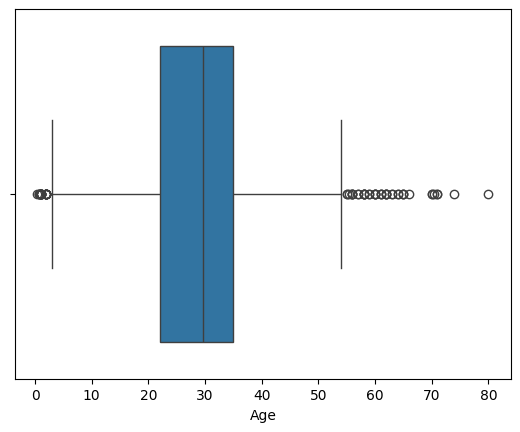

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data['Age'])
plt.show()

* Scatterplot (диаграмма рассеяния): Используется для обнаружения выбросов в двух и более переменных. По факту просто отображает объекты на плоскости их двух признаков. После этого проводится визуальный анализ на то какие точки "выбиваются".

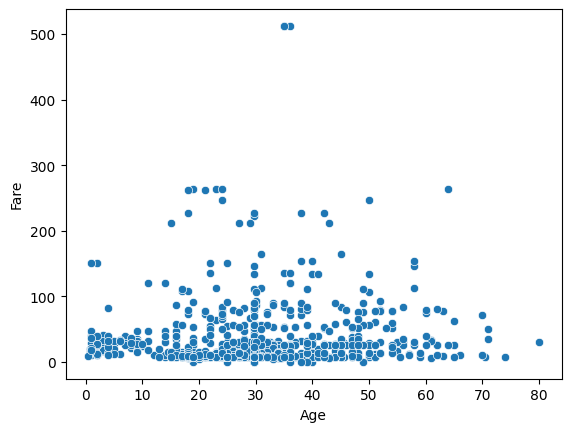

In [79]:
sns.scatterplot(x=data['Age'], y=data['Fare'])
plt.show()


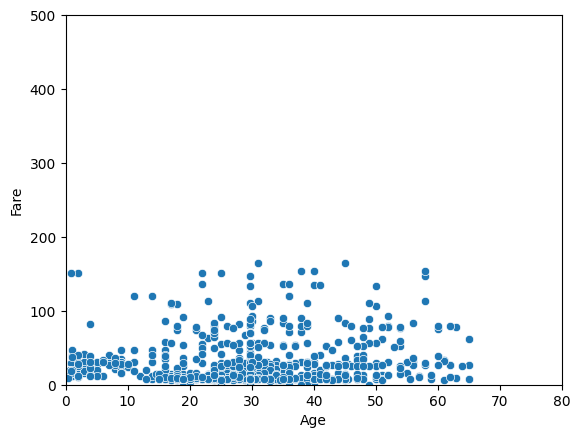

In [82]:
#Удалим выбросы (Age > 65, Fare > 200)
data = data[(data['Age'] <= 65) & (data['Fare'] <= 200)]

sns.scatterplot(x=data['Age'], y=data['Fare'])
#Масштаб 500 х 80
plt.xlim(0, 80)
plt.ylim(0, 500)
plt.show()

In [83]:
data

,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,Unknown,False,False,True,True,False,False,True
1,1,38.000000,1,0,71.2833,C85,True,False,False,False,True,False,False
2,1,26.000000,0,0,7.9250,Unknown,False,False,True,False,False,False,True
3,1,35.000000,1,0,53.1000,C123,True,False,False,False,False,False,True
4,0,35.000000,0,0,8.0500,Unknown,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,Unknown,False,True,False,True,False,False,True
887,1,19.000000,0,0,30.0000,B42,True,False,False,False,False,False,True
888,0,29.699118,1,2,23.4500,Unknown,False,False,True,False,False,False,True
889,1,26.000000,0,0,30.0000,C148,True,False,False,True,True,False,False


In [22]:
#Сохраним обработанный DataFrame в файл:
data.to_csv('Titanic-Dataset-Processed.csv', index=False)